In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [1]:
t, B, N, J = (1, 3, 32, 1)
kb = 1
ß = 1/kb/t

In [4]:
def TF_matrix(ß,t,B,N,J):
    T = np.array([[np.exp(J*ß+B*ß),np.exp(-J*ß)],[np.exp(-J*ß),np.exp(J*ß-B*ß)]])
    return T
print(TF_matrix(ß,t,B,N,J))

[[54.59815003  0.36787944]
 [ 0.36787944  0.13533528]]


In [5]:
t, B, N, J = (1, 0, 32, 1)
eigen_value, eigen_vector = np.linalg.eig(TF_matrix(ß,t,B,N,J))

def Exact_eigenvalues(ß,t,B,N,J):
    lambda1 = np.exp(ß*J)*np.cosh(ß*B) + np.sqrt(np.exp(-2*ß*J) + np.exp(2*ß*J)*np.sinh(ß*B)**2)
    lambda2 = np.exp(ß*J)*np.cosh(ß*B) - np.sqrt(np.exp(-2*ß*J) + np.exp(2*ß*J)*np.sinh(ß*B)**2)
    return np.array([lambda1,lambda2])

print('eigen_value: ', eigen_value)
print('exact:', Exact_eigenvalues(ß,t,B,N,J))

eigen_value:  [3.08616127 2.35040239]
exact: [3.08616127 2.35040239]


In [6]:
t, B, N, J = (1, 1, 32, 1)

def partition_function(ß,t,B,N,J):
    T = TF_matrix (ß,t,B,N,J) 
    z = np.array([[1,0],[0,1]]) 
    for i in range(N):
        z = z.dot(T) 
    return z

print('Use Trace: ', np.trace(partition_function(ß,t,B,N,J)))
print('exact: ', np.sum(Exact_eigenvalues(ß,t,B,N,J)**N))

Use Trace:  6.831231967849143e+27
exact:  6.831231967849113e+27


In [7]:
t, B, N, J = (1, 10, 16, 1)

print('Use Trace: ', np.trace(partition_function(ß,t,B,N,J)))
print('exact: ', np.sum(Exact_eigenvalues(ß,t,B,N,J)**N))

Use Trace:  2.7279023204583233e+76
exact:  2.7279023204583204e+76


In [8]:
t, B, N, J = (0.1, 1, 32, 1)

print('Use Trace: ', np.trace(partition_function(ß,t,B,N,J)))
print('exact: ', np.sum(Exact_eigenvalues(ß,t,B,N,J)**N))

Use Trace:  6.831231967849143e+27
exact:  6.831231967849113e+27


In [9]:
t, B, N, J = (1, 1, 10, 1)

print('Use Trace: ', np.trace(partition_function(ß,t,B,N,J)))
print('exact: ', np.sum(Exact_eigenvalues(ß,t,B,N,J)**N))

Use Trace:  499207324.1349155
exact:  499207324.1349148


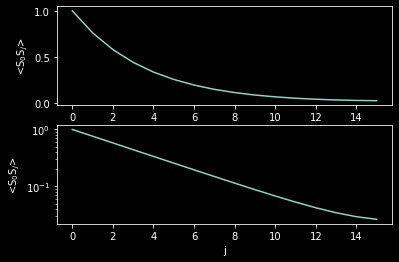

In [10]:
t, B, N, J = (1, 0, 32, 1)

T = TF_matrix(ß,t,B,N,J)
z0 = np.array([[1,0],[0,-1]])
output = np.zeros(N+1)

for j in range(N):
    z = np.array([[1,0],[0,1]])
    z_0j = z0
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_0j = z_0j.dot(z0).dot(T)
        else :
            z_0j = z_0j.dot(T)
    output[j] = np.trace(z_0j)/np.trace(z)
output[N]=output[0]

plt.style.use('dark_background')
plt.subplot(2, 1, 1)
plt.plot(output[0:N//2]) 
plt.xlabel('j') 
plt.ylabel('<S$_{0}$S$_{j}$>')
plt.subplot(2, 1, 2) 
plt.plot(output[0:N//2]) 
plt.xlabel('j') 
plt.ylabel('<S$_{0}$S$_{j}$>') 
plt.yscale('log')

plt.show()

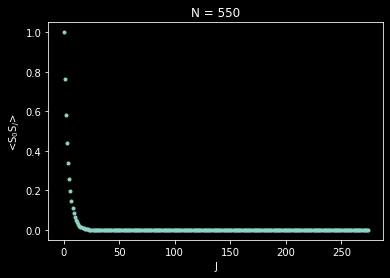

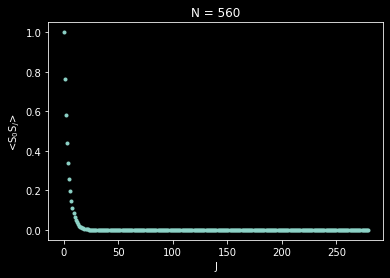

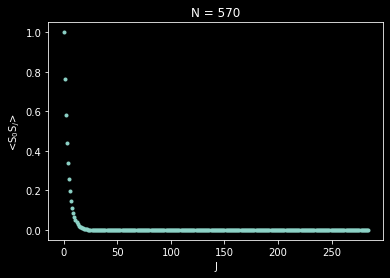

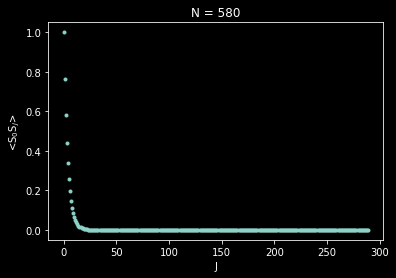

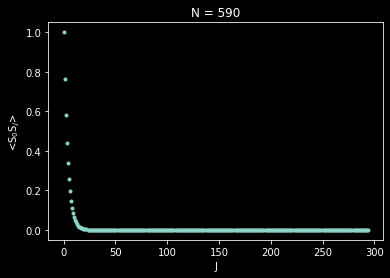

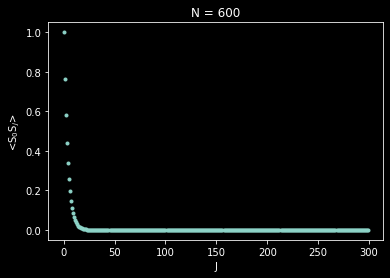

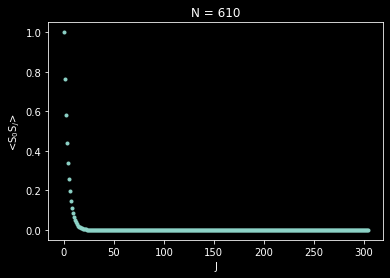

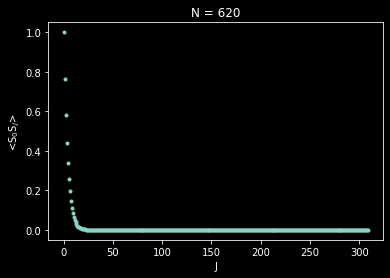

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


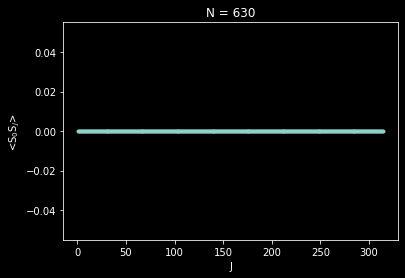

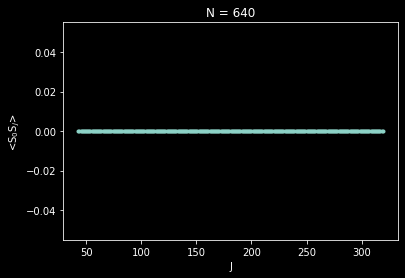

In [22]:
for i in range (10):
    t, B, N, J = (1, 0, 550+10*i, 1)

    T = TF_matrix(ß,t,B,N,J)
    z0 = np.array([[1,0],[0,-1]])
    output = np.zeros(N+1)

    for j in range(N):
        z_0j = z0
        z = np.array([[1,0],[0,1]])
        for i in range(N):
            z = z.dot(T)
            if i==j:
                z_0j = z_0j.dot(z0).dot(T)
            else :
                z_0j = z_0j.dot(T)
        output[j] = np.trace(z_0j)/np.trace(z)
    output[N]=output[0]

    plt.plot(output[0:N//2],'.')
    plt.xlabel('J')
    plt.ylabel('<S$_{0}$S$_{j}$>')
    plt.title('N = '+ str(N))
    plt.show()


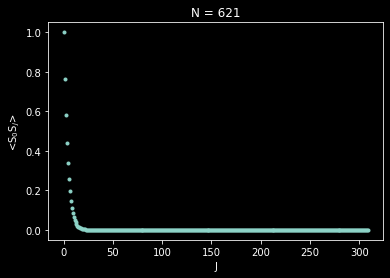

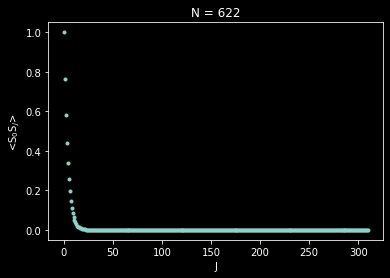

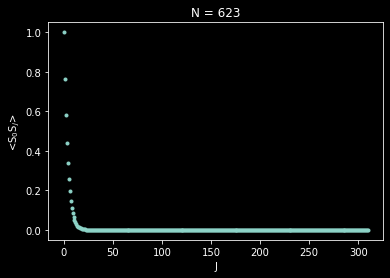

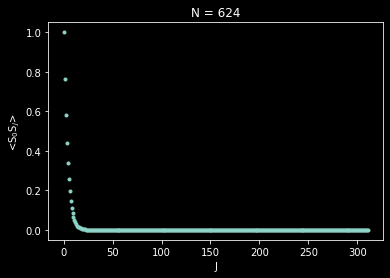

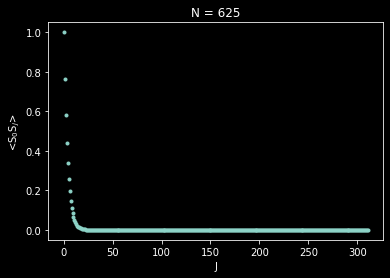

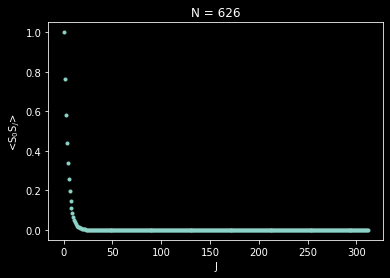

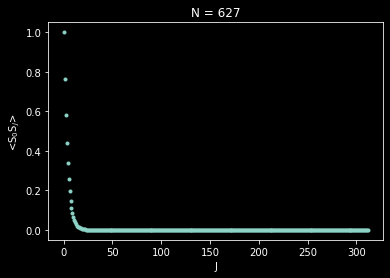

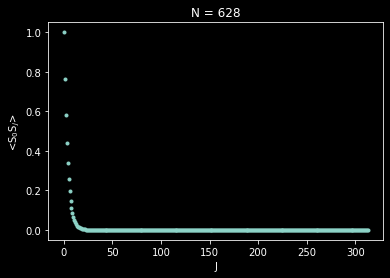

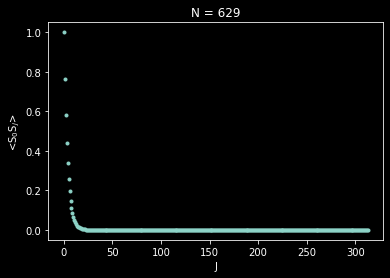

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


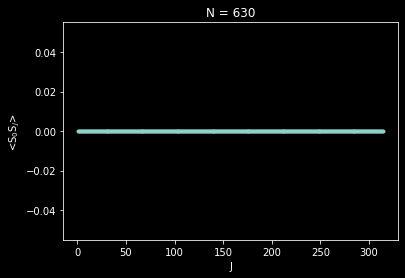

In [23]:
for i in range (10):
    t, B, N, J = (1, 0, 621 + i, 1)

    T = TF_matrix(ß,t,B,N,J)
    z0 = np.array([[1,0],[0,-1]])
    output = np.zeros(N+1)

    for j in range(N):
        z_0j = z0
        z = np.array([[1,0],[0,1]])
        for i in range(N):
            z = z.dot(T)
            if i==j:
                z_0j = z_0j.dot(z0).dot(T)
            else :
                z_0j = z_0j.dot(T)
        output[j] = np.trace(z_0j)/np.trace(z)
    output[N]=output[0]

    plt.plot(output[0:N//2],'.')
    plt.xlabel('J')
    plt.ylabel('<S$_{0}$S$_{j}$>')
    plt.title('N = '+ str(N))
    plt.show()

In [16]:
print('Largest N = ', 629)

Largest N =  629


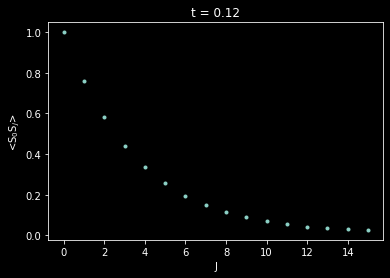

In [21]:
t, B, N, J = (0.12, 0, 32, 1)
output = np.zeros(N+1)
z0 = np.array([[1,0],[0,-1]])
T = TF_matrix(ß,t,B,N,J)
for j in range(N):
    z_0j = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_0j = z_0j.dot(z0).dot(T)
        else :
            z_0j = z_0j.dot(T)
    output[j] = np.trace(z_0j)/np.trace(z)
output[N]=output[0]
plt.plot(output[0:N//2],'.')
plt.xlabel('J')
plt.ylabel('<S$_{0}$S$_{j}$>')
plt.title('t = '+str(t))
plt.show()


In [24]:
print('t = 0.12')

t = 0.12
